In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
df = pd.read_csv('playstore-analysis.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [180]:
df.shape

(10841, 13)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [182]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1) Data clean up – Missing value treatment
###     a)Drop records where rating is missing since rating is our target/study variable

In [183]:
df['Rating'].value_counts(dropna=False)

NaN     1474
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.8        8
1.7        8
2.1        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [184]:
df.dropna(subset=['Rating'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


### b)  Check the null values for the Android Ver column

In [185]:

df['Android Ver'].isnull().sum()

3

### i.  Are all 3 records having the same problem?

In [186]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



### ii. Drop the 3rd record i.e. record for “Life Made WIFI …

In [187]:
df.drop([10472],inplace=True)

In [188]:
df[df.isnull().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


### iii. Replace remaining missing values with the mode

In [189]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)
df['Android Ver'].isnull().sum()

0

### c)  Current ver – replace with most common value

In [190]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Current Ver'].isnull().sum()

0

## 2. Data clean up – correcting the data types
###  a) Which all variables need to be brought to numeric types?

<p>Rating, Reviews,Size,Price and Intalls should be Numeric</p>

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [192]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [193]:
print('Review and Rating shoulbe Numeric')
print('\n------------------------------')
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')
df.info()

Review and Rating shoulbe Numeric

------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


### b) Price variable – remove sign and convert to ﬂoat

In [194]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))
print(df['Price'])
df['Price'] = df['Price'].astype('float')
df.info()

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1

### c)  Installs – remove ‘,’ and ‘+’ sign, convert to intege

In [195]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','').replace('+','').strip())
df['Installs'].head()

#Converting into Integer
df['Installs'] = df['Installs'].astype('int')
df.info()
df.Installs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.8+ KB


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

### d) Convert all other identiﬁed columns to numeric

In [196]:
df.info()
print('\n------------------------')
print('All Columns are of required type')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.8+ KB

------------------------
All Columns are of required type



## 3. Sanity checks – check for the following and handle accordingly
###   a)  Avg. rating should be between 1 and 5, as only these values are allowed on the play store

In [197]:
print(df.loc[df.Rating<1] & df.loc[df.Rating>5])

print('There is no such record')

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []
There is no such record


### b) Reviews should not be more than installs as only those who installed can review the app.

In [198]:
print(df.loc[df['Reviews'] > df['Installs']])
print('There are 7 such records')

                                 App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000    

In [199]:
df.drop(df.loc[df['Reviews'] > df['Installs']].index,inplace=True)
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 4. Identify and handle outliers 
###   a.  Price column
####       i.  Make suitable plot to identify outliers in price

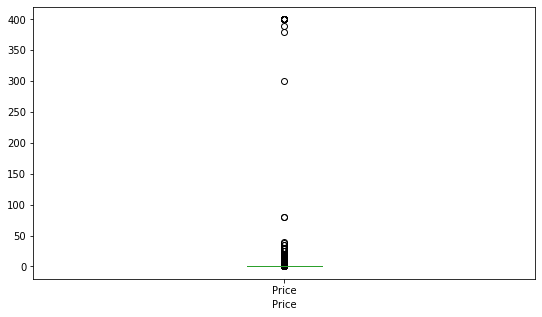

In [200]:
df['Price'].plot(kind='box',figsize =(9,5))
plt.xlabel('Price')
plt.show()

### ii. Do you expect apps on the play store to cost 200? Check out these case

In [201]:
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [202]:
print('Yes we can expect apps on the play store cost $200')

Yes we can expect apps on the play store cost $200


### iv. Limit data to records with price < 30

In [203]:
price_30 = df[df['Price']>30].index
df.drop(labels = price_30,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9338 non-null   object 
 1   Category        9338 non-null   object 
 2   Rating          9338 non-null   float64
 3   Reviews         9338 non-null   int64  
 4   Size            9338 non-null   float64
 5   Installs        9338 non-null   int32  
 6   Type            9338 non-null   object 
 7   Price           9338 non-null   float64
 8   Content Rating  9338 non-null   object 
 9   Genres          9338 non-null   object 
 10  Last Updated    9338 non-null   object 
 11  Current Ver     9338 non-null   object 
 12  Android Ver     9338 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 984.9+ KB


In [204]:
df['Price'].max()

29.99

### iii. After dropping the useless records, make the suitable plot again to identify outliers

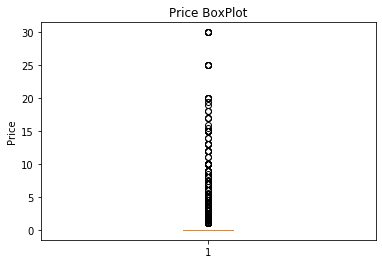

In [205]:
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Price BoxPlot')
plt.show()

## b. Reviews column
### i. Make suitable plot

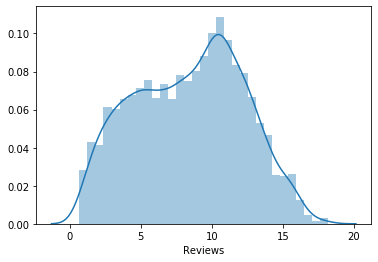

In [206]:
rp = sns.distplot(np.log1p(df['Reviews']))
plt.show()

### ii. Limit data to apps with < 1 Million reviews

In [207]:
review_limit = df.loc[df['Reviews']>1000000].index
df.drop(labels = review_limit,inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8634 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8634 non-null   object 
 1   Category        8634 non-null   object 
 2   Rating          8634 non-null   float64
 3   Reviews         8634 non-null   int64  
 4   Size            8634 non-null   float64
 5   Installs        8634 non-null   int32  
 6   Type            8634 non-null   object 
 7   Price           8634 non-null   float64
 8   Content Rating  8634 non-null   object 
 9   Genres          8634 non-null   object 
 10  Last Updated    8634 non-null   object 
 11  Current Ver     8634 non-null   object 
 12  Android Ver     8634 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 910.6+ KB


In [208]:
df[df['Reviews']>1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## c) Installs
### i. What is the 95th percentile of the installs?

In [209]:
percentile = df['Installs'].quantile(0.95)
print(percentile,'is 95th percentile of Installs')

10000000.0 is 95th percentile of Installs


###  ii. Drop records having a value more than the 95th percentile

In [210]:
percentile_install = df.loc[df['Installs']> percentile].index
df.drop(labels = percentile_install,inplace = True)

In [211]:
df.loc[df['Installs']> percentile].index

Int64Index([], dtype='int64')

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values

### a. How do you explain this?

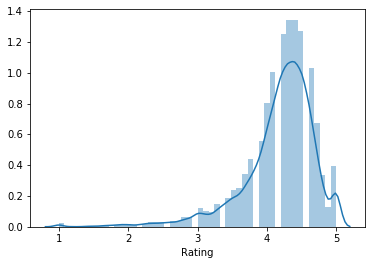

The skewness of this distribution is -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


In [212]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df['Rating'].median(),df['Rating'].mean()))

In [213]:
df['Rating'].mode()

0    4.3
dtype: float64

### ii. What is the implication of this on your analysis?
<p>Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values.</p>

## 6.  What are the top Content Rating values?
###   a. Are there any values with very few records?

In [214]:
df['Content Rating'].value_counts(ascending=True)

Unrated               1
Adults only 18+       3
Everyone 10+        332
Mature 17+          417
Teen                900
Everyone           6782
Name: Content Rating, dtype: int64

In [215]:
print('Adults only 18+ and Unrated are values with very few records')

Adults only 18+ and Unrated are values with very few records


### b. If yes, drop those as they won’t help in the analysis

In [216]:
df['Content Rating'] = df['Content Rating'].apply(lambda x: x.replace('Unrated','NaN').replace('Adults only 18+','NaN'))
df['Content Rating'].value_counts(dropna=False)

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
NaN                4
Name: Content Rating, dtype: int64

In [217]:
temp = df[df['Content Rating']=='NaN'].index
df.drop(labels =temp,inplace = True)
df['Content Rating'].value_counts(dropna=False)

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## 7. Effect of size on rating
###  a. Make a joinplot to understand the effect of size on rating

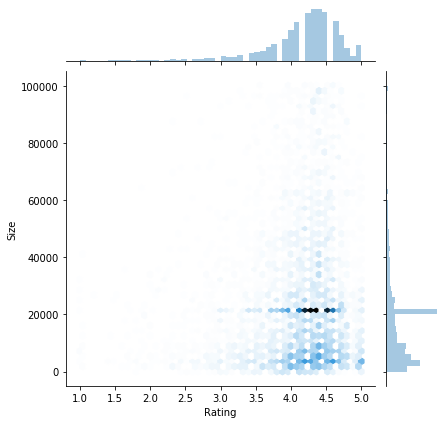

In [218]:
sns.jointplot(y ='Size', x ='Rating', data = df, kind ='hex')
plt.show()

### b. Do you see any patterns?

In [219]:
print('their is correlation between Size and Rating')

their is correlation between Size and Rating


### c. How do you explain the pattern?

<p>Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size.</p>

##  8. Effect of price on rating
###  a. Make a jointplot (with regression line)

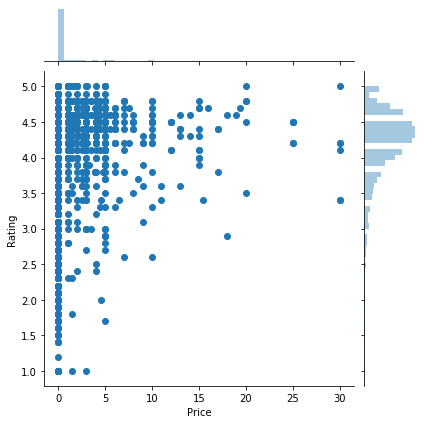

In [220]:
sns.jointplot(x='Price', y='Rating', data=df)
plt.show()

### b. What pattern do you see?
<p> Generally on increasing the Price, Rating remains almost constant greater than 4.</p>

### c. How do you explain the pattern?
<p>Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.</p>

### d. Replot the data, this time with only records with price > 0

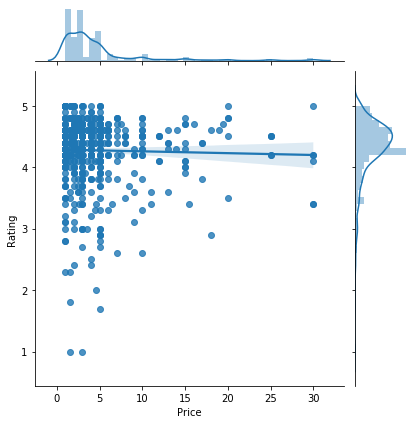

In [221]:
temp=df.loc[df.Price>0]
sns.jointplot(x='Price', y='Rating', data=temp, kind='reg')
plt.show()

### e. Does the pattern change?
<p>Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.</p>

### f. What is your overall inference on the effect of price on the rating?
<p>Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4</p>

## 9. Look at all the numeric interactions together –

### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

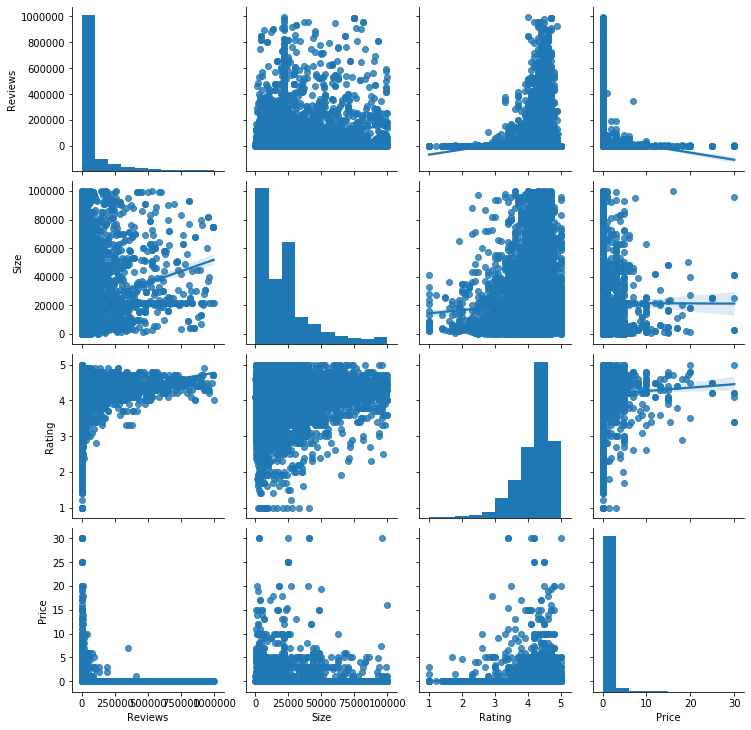

In [222]:
sns.pairplot(df,vars =['Reviews','Size','Rating','Price'],kind = 'reg')
plt.show()

## 9. Rating vs. content rating
### a. Make a bar plot displaying the rating for each content rating

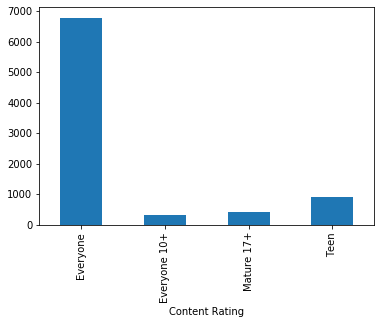

In [223]:
df.groupby('Content Rating')['Rating'].count().plot(kind='bar')
plt.show()

### b. Which metric would you use? Mean? Median? Some other quantile?

<p>We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.</p>

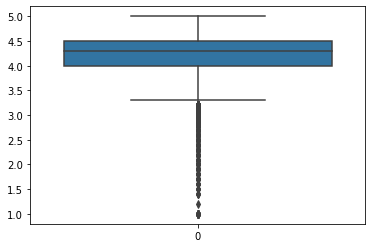

In [224]:
sns.boxplot(data=df['Rating'])
plt.show()

### c. Choose the right metric and plot

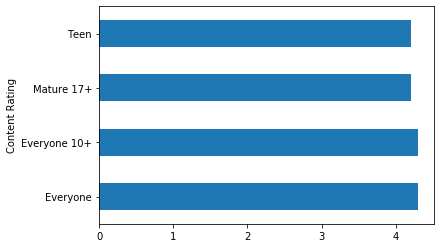

In [225]:
df.groupby('Content Rating')['Rating'].median().plot(kind ='barh',rot=0)
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
###  a) Create 5 buckets (20% records in each) based on Size

In [226]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [227]:
temp3 = df.pivot_table(values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


## c. Make a heatmap of this
### i.  Annotated

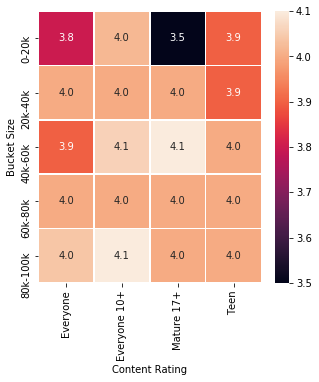

In [228]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

### ii. Greens color map

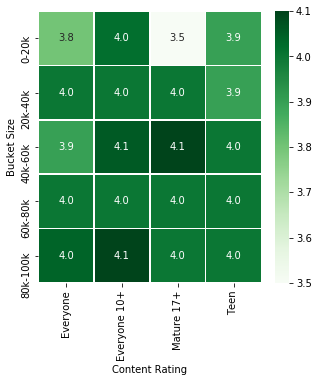

In [229]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?
<p>Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.</p>